## PROTEIN GENERATOR to test runs and play around

In [1]:
import os, sys, json

with open('output/args.json','r') as f:
    args = json.load(f)
    
from utils.sampler import SEQDIFF_sampler

S = SEQDIFF_sampler(args)

### Specify parameters here

In [2]:
# ARGUMENTS
args['sequence'] = 'X'*149 #None # starting sequence where X is mask token for example: XXXXXXXXXXXPEPSEQXXXXXXXXXXXX
# args['sequence'] = 'X'*65 #None # starting sequence where X is mask token for example: XXXXXXXXXXXPEPSEQXXXXXXXXXXXX

args['pdb'] = None # path to pdb to diffuse
args['contigs'] = None # contigs for design use, to sample range use ['70-80'] aa, to add strucutral and sequence conditioning from pdb use chain
args['out'] = './output/designs/design' # path with prefix to where you want to save outputs
args['save_best_plddt'] = True # if true will save best plddt example in the trajectory
args['hotspots'] = None # residues to have model target for binder design probelms specified as a list of chain and pdb index example 'B23,B45,B66'
args['save_args'] = True # will save args as json
args['dump_trb'] = True # will save trb with meta data from run

# SECONDARY STRUCTURE BIAS (options a, b, c)
# option a
args['secondary_structure'] = None # dssp string 'XXXXXHHHHHHHXXXXLLLLXXXXEEEEEEEEEEEEEXXX' for each residue
# option b
args['dssp_pdb'] = None # path to pdb to copy dssp features of
# option c
args['helix_bias'] = 0.00 # fraction of sequence to randomly bias toward helix, recommend [0,0.05]
args['strand_bias'] = 0.00 # fraction of sequence to randomly bias toward helix, recommend [0,0.05]
args['loop_bias'] = 0.00 # fraction of sequence to randomly bias toward helix, recommend [0,0.05]

# GUIDING POTENTIALS (can use in combination)
# aa_bias
args['aa_composition'] = 'W0.2' # amino acid one letter char and fraction of seq to bias as a list 'W0.2,Y0.1'
# charge
args['target_charge'] = -10 # target charge to bias toward
args['target_pH'] = 7.4 # target ph to design in 
# hydrophobic
args['hydrophobic_score'] = -10 # hydrophobic GRAVY score to bias toward (use negative score to bias away from hyrdophobic
# text protclap guidance

# A4Y929
# args['actual_sequence'] = 'MLILTRRVGETLMIGDEVTVTVLGVKGNQVRIGVNAPKEVSVHREEIYQRIQSEKSGSPSEGGNF' # for diagnostics 
# args['text_prompt'] = "A key translational regulator that binds mRNA to regulate translation initiation and/or mRNA stability. Mediates global changes in gene expression, shifting from rapid growth to stress survival by linking envelope stress, the stringent response and the catabolite repression systems. Usually binds in the 5'-UTR; binding at or near the Shine-Dalgarno sequence prevents ribosome-binding, repressing translation, binding elsewhere in the 5'-UTR can activate translation and/or stabilize the mRNA. Its function is antagonized by small RNA(s). Homodimer; the beta-strands of each monomer intercalate to form a hydrophobic core, while the alpha-helices form wings that extend away from the core. Belongs to the CsrA/RsmA family."

# CALM1
args['actual_sequence'] = 'MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK' # for diagnostics 
args['text_prompt'] = "Calmodulin is a small, highly conserved protein that is 148 amino acids long (16.7 kDa)." \
" The protein has two approximately symmetrical globular domains (the N- and C- domains) each containing a pair of " \
"EF hand motifs[5] separated by a flexible linker region for a total of four Ca2+ binding sites, two in each globular " \
"domain.[6] In the Ca2+-free state, the helices that form the four EF-hands are collapsed in a compact orientation, and " \
"the central linker is disordered;[5][6][7][8] in the Ca2+-saturated state, the EF-hand helices adopt an open orientation " \
"roughly perpendicular to one another, and the central linker forms an extended alpha-helix in the crystal structure,[5][6] " \
"but remains largely disordered in solution.[9] The C-domain has a higher binding affinity for Ca2+ than the N-domain. " \
"The EF hand is a helix–loop–helix structural domain or motif found in a large family of calcium-binding proteins. "
args['clap_temp'] = 1 # sampling temperature
args['test_ablation'] = False
# for any potential used you must specify the following
args['potentials'] = 'protclap' # comma seperated list of potentials used 'aa_bias,charge,hydrophobic,protclap,target'
args['potential_scale'] = '5' # comma seperated list of weights for each potential in same order as potentials 
args['potential_scale_schedule'] = True # if true linearly increases potential scale

# DIFFUSION PARAMS
args['T'] = 100 # num steps to use (can use 10 or 15 steps to test), 25 is generally good, but use 50 or 100 for harder problems and better AF2 results

# PARTIAL DIFFUSION
args['sampling_temp'] = 1.0 # set to 1.0 for full diffusion, else entering partial diffusion mode, diffusing to specified temperature of input
args['trb'] = None # path to trb if you want to partially diffuse and use the same contigs, else you can input a pdb or sequence to partially diffuse from

# send args to sampler and initialize diffuser and model
S.set_args(args)
S.model_init()
S.diffuser_init()

Loading model checkpoint...
Successfully loaded model checkpoint


### Generate Samples
Once you generate samples you like, use the args.json file saved to launch a production run

For example:
```
python ./inference.py -input_json ./examples/out/design_000000_args.json
```

In [3]:
for i in range(1):
    S.generate_sample()

Preparing sequence input
Using potential: protclap


d:\CSCI2840Final\envs\proteingenerator\lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


[ProtCLAP] baseline cos-sim: 0.0537
Generating sample 000000 ...
[ProtCLAP] current cos-sim: -0.0346
[ProtCLAP] seq distance to actual: 0.859

Potential Scale Multiplier: 0.0100
RATLTVNLYLLLLRGDASLLLLETGVILAAAIFGANLLGTLLPLALRRGLEARIVIEALGPLFARAEARSLLDVALRLLVLNANGALLLVAEQVRVLAEAQGAGTLEEALQALLANGLQATAPLPSLRVDLAPLALDKYLDLLGLLSSL
    TIMESTEP [100/100]   |   current PLDDT: 0.1633   <<  >>   best PLDDT: 0.1633   ||   best COS_SIM: -0.0346
[ProtCLAP] current cos-sim: -0.0157
[ProtCLAP] seq distance to actual: 0.893

Potential Scale Multiplier: 0.0200
APVLVLARLLEEVLALLLSLLVLLLPLELLLLLALLLLLLPASAALLGALLASLGRLALLVLTLLLLILLKALAGLLLILALLLLLLALLLLELLLALKGLVLLLLALALAKSLAALRLALLAALALTARGGELLLLLAVAIALGLLLL
    TIMESTEP [99/100]   |   current PLDDT: 0.1616   <<  >>   best PLDDT: 0.1633   ||   best COS_SIM: -0.0157
[ProtCLAP] current cos-sim: 0.0238
[ProtCLAP] seq distance to actual: 0.866

Potential Scale Multiplier: 0.0300
SKPVLALLESLLGLALLNLPLLLLEAGLALAAALAALAALLLLLLEEAGSARLLLLLALNEELALAGLLAPLKELLLR

In [4]:
import py3Dmol

# Load PDB file contents
with open('./output/designs/design_000000.pdb', 'r') as file:
    pdb_data = file.read()

# Create the viewer<
view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_data, 'pdb')  # Add PDB model
view.setStyle({'cartoon': {'color': 'spectrum'}})  # Use cartoon style
view.zoomTo()  # Auto-zoom
view.show()  # Render in notebook

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
import py3Dmol

# Load PDB file contents
with open('./output/designs/design_000000_best_cos.pdb', 'r') as file:
    pdb_data = file.read()

# Create the viewer<
view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_data, 'pdb')  # Add PDB model
view.setStyle({'cartoon': {'color': 'spectrum'}})  # Use cartoon style
view.zoomTo()  # Auto-zoom
view.show()  # Render in notebook

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

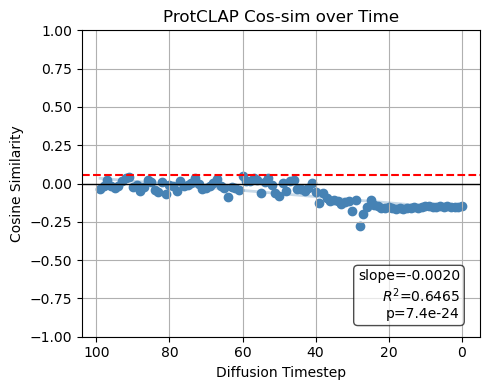

Saved 'ProtCLAP Cos-sim over Time' to ./output/designs\cos_sim_over_time.png


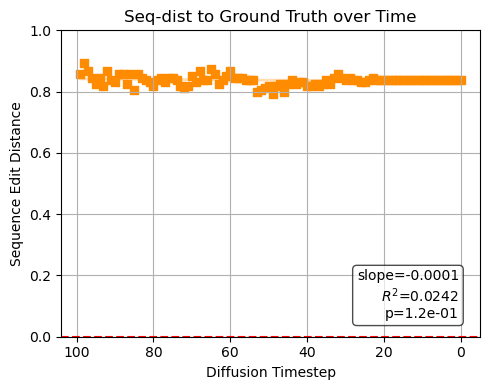

Saved 'Seq-dist to Ground Truth over Time' to ./output/designs\seq_distance_over_time.png


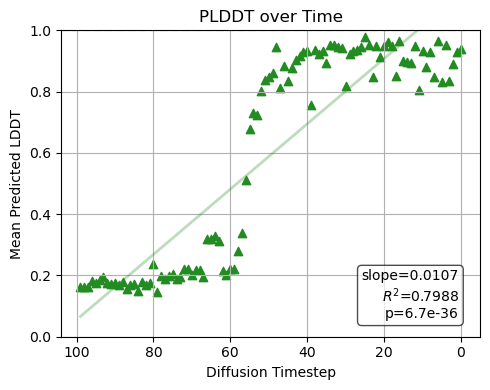

Saved 'PLDDT over Time' to ./output/designs\plddt_over_time.png


In [6]:
import argparse
import torch
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# load the trajectory dict
traj = torch.load('./output/designs/design_000000_trajectory.pt', map_location="cpu")
outdir = './output/designs'

def extract_metric(traj, pattern):
    steps, vals = [], []
    for key, val in traj.items():
        m = re.match(pattern, key)
        if m:
            steps.append(int(m.group(1)))
            vals.append(val)
    pairs = sorted(zip(steps, vals), key=lambda x: x[0])
    if not pairs:
        return [], []
    s, v = zip(*pairs)
    return list(s), list(v)

def plot_metric(steps, vals, *,
                color, marker,
                xlabel, ylabel, title,
                outpath,
                ylim=None,
                invert_x=True,
                baseline=None,
                zero_line=False):
    steps = np.asarray(steps, dtype=float)
    vals  = np.asarray(vals,  dtype=float)

    # fit
    slope, intercept, r_val, p_val, _ = linregress(steps, vals)
    fit_y = intercept + slope * steps

    plt.figure(figsize=(5,4))
    # scatter points
    plt.scatter(steps, vals, color=color, marker=marker, label=title)
    # best-fit line (semi-transparent)
    plt.plot(steps, fit_y, color=color, alpha=0.3, linewidth=2, label="Best fit")
    # annotations
    plt.text(
        0.95, 0.05,
        f"slope={-slope:.4f}\n$R^2$={r_val**2:.4f}\np={p_val:.1e}",
        ha='right', va='bottom', transform=plt.gca().transAxes,
        fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7)
    )
    # optional additional lines
    if baseline is not None:
        plt.axhline(baseline, color='red', linestyle='--', label="Baseline")
    if zero_line:
        plt.axhline(0, color='black', linestyle='-', linewidth=1)

    # axes
    if ylim:
        plt.ylim(*ylim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if invert_x:
        plt.gca().invert_xaxis()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(outpath, dpi=300)
    plt.show()
    plt.close()
    print(f"Saved {title!r} to {outpath}")

# Cosine similarity
cos_steps, cos_vals = extract_metric(traj, r'cos_sim_step(\d+)')
baseline = traj.get('baseline_cos_sim', None)
plot_metric(
        cos_steps, cos_vals,
        color='steelblue', marker='o',
        xlabel="Diffusion Timestep",
        ylabel="Cosine Similarity",
        title="ProtCLAP Cos-sim over Time",
        outpath=os.path.join(outdir, "cos_sim_over_time.png"),
        ylim=(-1, 1),
        baseline=baseline,
        zero_line=True
    )

# Sequence edit distance
dist_steps, dist_vals = extract_metric(traj, r'seq_dist_step(\d+)')
plot_metric(
        dist_steps, dist_vals,
        color='darkorange', marker='s',
        xlabel="Diffusion Timestep",
        ylabel="Sequence Edit Distance",
        title="Seq-dist to Ground Truth over Time",
        outpath=os.path.join(outdir, "seq_distance_over_time.png"),
        ylim=(0, 1),
        baseline=0
    )


# Mean PLDDT
plddt_steps, plddt_vals = extract_metric(traj, r'plddt_step(\d+)')
plot_metric(
        plddt_steps, plddt_vals,
        color='forestgreen', marker='^',
        xlabel="Diffusion Timestep",
        ylabel="Mean Predicted LDDT",
        title="PLDDT over Time",
        outpath=os.path.join(outdir, "plddt_over_time.png"),
        ylim=(0, 1),
        baseline=1
    )